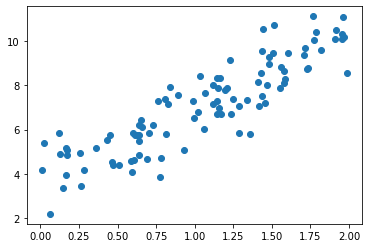

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X,y)

In [2]:
#

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
#np.c_ 列方向（水平方向）に配列を連結する
# .dotは2つの配列の行列積
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
#.Tは、NumPy配列の転置（行１と列の入れ替え）を行うための属性です
theta_best

array([[3.63295262],
       [3.28683852]])

In [3]:
# make prediction with theta_best
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.63295262],
       [10.20662966]])

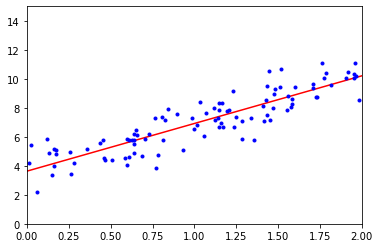

In [4]:
plt.plot(X_new, y_predict, "r-") #r color and line type
plt.plot(X,y, "b.") # blue color and dot type
plt.axis([0,2,0,15])
plt.show()

In [5]:
# this can be performed by Linear Regression using Schikit-Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
# intercept_ 線形回帰モデルにおける切片の値
# coef_ 各特徴量の係数（coefficient）の値,帰直線の傾きや各特徴量の目的変数への寄与度
# 各特徴量の重み、つまり、多数の特徴量から計算できた重ね合わせた　勾配　

(array([3.63295262]), array([[3.28683852]]))

In [6]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd
# LinearRegression is based on scipy.linalg.lstsq() so we can call it directly like this

array([[3.63295262],
       [3.28683852]])

In [7]:
np.linalg.pinv(X_b).dot(y)
# also like this

array([[3.63295262],
       [3.28683852]])

In [8]:
# Gradient Descent
X_b.shape

(100, 2)

In [9]:
# Batch Gradient Descent
eta = 0.1 # learning rate
n_iterations = 100
m= 100
theta = np.random.randn(2,1)
for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta-eta *gradients
theta

array([[3.54140653],
       [3.3631611 ]])

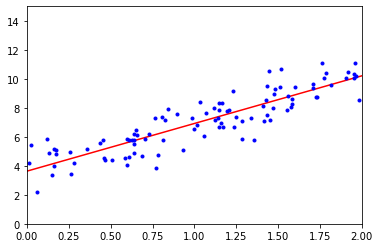

In [10]:
y_predict_1 = X_new_b.dot(theta)
plt.plot(X_new, y_predict, "r-") #r color and line type
plt.plot(X,y, "b.") # blue color and dot type
plt.axis([0,2,0,15])
plt.show()

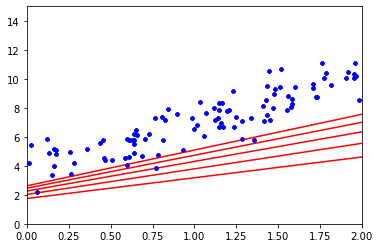

In [11]:
eta = 0.002  # learning rate
n_iterations = 100
m = 100

fig, ax = plt.subplots()
theta = np.random.randn(2, 1)

for iterations in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    if iterations % 20 == 1:
        y_predict_1 = X_new_b.dot(theta)
        ax.plot(X_new, y_predict_1, "r-")  # r color and line type
        ax.plot(X, y, "b.")  # blue color and dot type

plt.axis([0, 2, 0, 15])
plt.show()
# low leaning rate means it will take a long time to reach the best solution

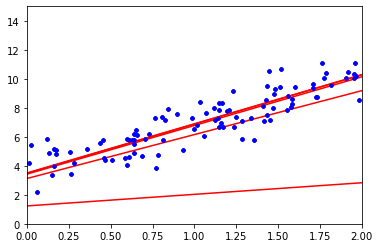

In [12]:
eta = 0.02  # learning rate
n_iterations = 100
m = 100

fig, ax = plt.subplots()
theta = np.random.randn(2, 1)

for iterations in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    if iterations % 20 == 1:
        y_predict_1 = X_new_b.dot(theta)
        ax.plot(X_new, y_predict_1, "r-")  # r color and line type
        ax.plot(X, y, "b.")  # blue color and dot type

plt.axis([0, 2, 0, 15])
plt.show()
# performs quite well

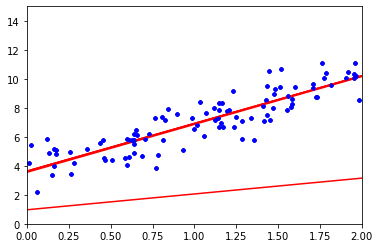

In [13]:
eta = 0.4  # learning rate
n_iterations = 100
m = 100

fig, ax = plt.subplots()
theta = np.random.randn(2, 1)

for iterations in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    if iterations % 20 == 1:
        y_predict_1 = X_new_b.dot(theta)
        ax.plot(X_new, y_predict_1, "r-")  # r color and line type
        ax.plot(X, y, "b.")  # blue color and dot type

plt.axis([0, 2, 0, 15])
plt.show()
# too high that the algorithm diverges, jumping all over the place

In [14]:
# grid search could be used in finding a good leaning rate


17


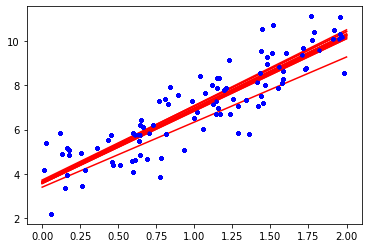

In [15]:
# stochastic Gradient Descent
# choose random instance in the training set at every step
# has abetter chance of finding the global minimum than Batch Gradient Descent does
# also, bad at finding local optima
n_epochs = 50
fig, ax = plt.subplots()
t0, t1 = 5, 50 # learning schedule hyperparameters
k=0
def learning_schedule(t):
    return t0/(t+t1)
m = 100
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch *m +i)
        theta = theta - eta*gradients
        if i % 100 == 1 and epoch % 3==1:
            k = k+1
            y_predict_1 = X_new_b.dot(theta)
            ax.plot(X_new, y_predict_1, "r-")  # r color and line type
            ax.plot(X, y, "b.")  # blue color and dot type
        
theta
print(k)
#randint は指定された範囲内でランダムな整数を生成する
# iterate by rounds of m iterations
#  each round is called an epoch
# set only 50 times and reachs a pretty good solution

In [16]:
# there is a model by sklearn to call this 
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter =1000, tol=1e-3, penalty =None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())
# y.ravel() は、NumPy 配列の次元を1次元に変換するためのメソッド
# y が既に1次元の形状を持つ場合や、学習アルゴリズムが1次元のターゲット変数を要求する場合は、
# y.ravel() を使用する必要があります

# max_iter は最大 iteration
# tolは収束の許容誤差, default is 1e-3
# penalty正則化項を指定します。デフォルトは None で正則化項は使用されません。
# 正則化項を利用する場合には、'l2'（リッジ回帰）や'l1'
# eta0（オプション）: 学習率の初期値を指定します。デフォルトは 0.1 です。

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.58882451]), array([3.24832696]))

In [18]:
# mini-batch Gradient Descent
# computes the gradients on small random sets of instances
# able to get a boost from hardware optimization from GPUs

In [ ]:

# a sample code for mini-batch Gradient Descent
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ダミーデータの生成
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SGDRegressorを使用してmini-batch Gradient Descentを実行
model = SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.01, learning_rate='constant', eta0=0.01, max_iter=1000, tol=1e-3, batch_size=32)
model.fit(X_train, y_train)

# テストデータで予測を行い、性能を評価
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)